In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Pengunjung_mall.csv")
dataset

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


In [4]:
x = dataset.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

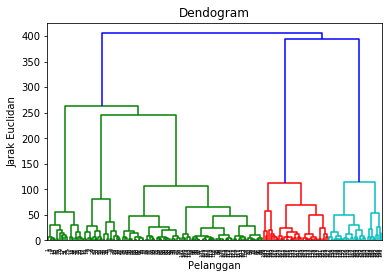

In [14]:
#Menggunakan dendrogram untuk menentukan jumlah cluster yang optimal
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method="ward")) #method ward akan meminimalisasi variansi antar cluster, mirip dengan elbow di K-Means yang meminimaliasasi SumOfSquares
plt.title("Dendogram")
plt.xlabel("Pelanggan")
plt.ylabel("Jarak Euclidan")
plt.show()

In [15]:
#Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

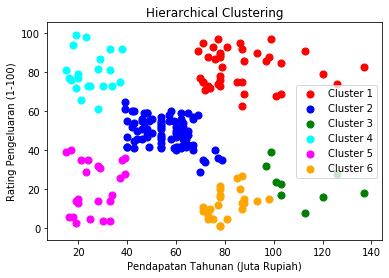

In [16]:
#Visualisasi hasil Hierarchical Clustering
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=50, c="red", label="Cluster 1")
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=50, c="green", label="Cluster 3")
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=50, c="cyan", label="Cluster 4")
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=50, c="magenta", label="Cluster 5")
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s=50, c="orange", label="Cluster 6")
plt.title("Hierarchical Clustering")
plt.xlabel("Pendapatan Tahunan (Juta Rupiah)")
plt.ylabel("Rating Pengeluaran (1-100)")
plt.legend()
plt.show()